In [68]:
import numpy as np
import pandas as pd
import sys, os, glob
import matplotlib.pyplot as plt

In [69]:
import seaborn as sns
sns.set(style='ticks', font_scale=1.6, font='times')
#sns.set(style='whitegrid', font_scale=1.6, font='times')
from matplotlib import rc
rc('text', usetex=True)

import warnings
warnings.filterwarnings('ignore')

In [70]:
figdir = 'plots/'

In [71]:
d, dlabel = pd.read_csv("iso_lina_all.csv"), 'iso'
dj, djlabel = pd.read_csv("joint_lina_all.csv"), 'joint'

In [72]:
len(d), len(dj)

(948, 944)

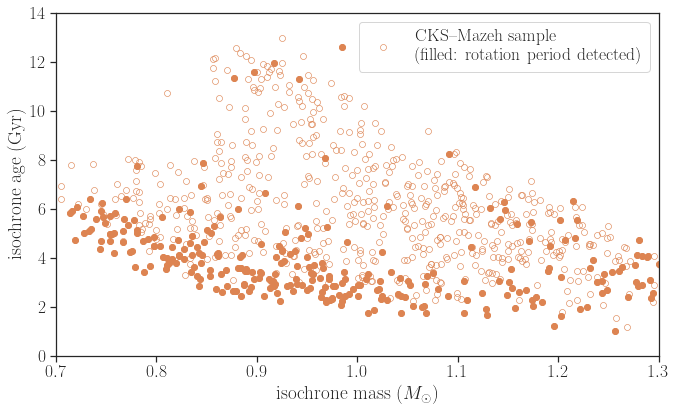

In [73]:
plt.figure(figsize=(12*0.9,7*0.9))
plt.xlabel("isochrone mass ($M_\odot$)")
plt.ylabel("isochrone age (Gyr)")
plt.plot(d.iso_mass, d.iso_age, 'o', mfc='none', mew=0.6, color='C1',
label='CKS--Mazeh sample\n(filled: rotation period detected)')
plt.plot(d.iso_mass[d.acf], d.iso_age[d.acf], 'o', color='C1', alpha=1, label='')
plt.legend(loc='best')
plt.xlim(0.7, 1.3)
plt.ylim(0, 14)
plt.savefig(figdir+"age_mass_%s.png"%dlabel, dpi=200, bbox_inches="tight")

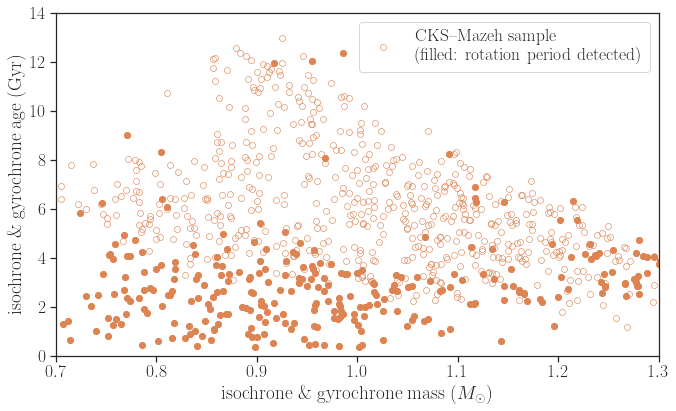

In [74]:
plt.figure(figsize=(12*0.9,7*0.9))
plt.xlabel("isochrone \& gyrochrone mass ($M_\odot$)")
plt.ylabel("isochrone \& gyrochrone age (Gyr)")
plt.plot(dj.iso_mass, dj.iso_age, 'o', mfc='none', mew=0.6, color='C1',
label='CKS--Mazeh sample\n(filled: rotation period detected)')
plt.plot(dj.iso_mass[dj.acf], dj.iso_age[dj.acf], 'o', color='C1', alpha=1, label='')
#plt.plot(dl.mass, dl.age, 'o', mfc='none', mew=0.6, color='C0')
#plt.plot(dl.mass[dl.acf], dl.age[dl.acf], 'o', color='C0', alpha=1, label='Prot detected (Louden+21)')
plt.legend(loc='best')
plt.xlim(0.7, 1.3)
plt.ylim(0, 14)
plt.savefig(figdir+"age_mass_%s.png"%djlabel, dpi=200, bbox_inches="tight")

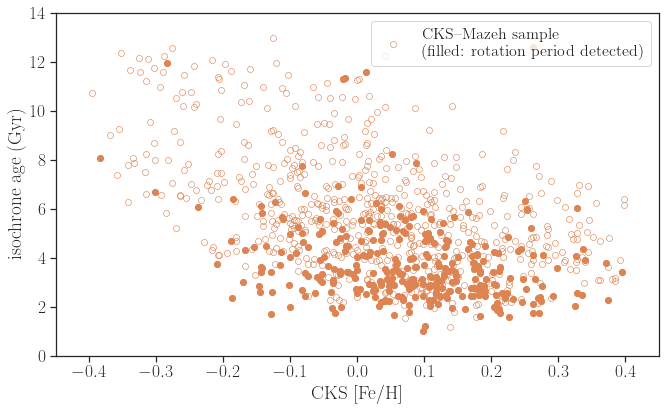

In [75]:
plt.figure(figsize=(12*0.9,7*0.9))
plt.xlabel("CKS [Fe/H]")
plt.ylabel("isochrone age (Gyr)")
plt.plot(d.feh, d.iso_age, 'o', mfc='none', mew=0.6, color='C1',
label='CKS--Mazeh sample\n(filled: rotation period detected)')
plt.plot(d.feh[d.acf], d.iso_age[d.acf], 'o', color='C1', alpha=1, label='')
plt.legend(loc='best', fontsize=16)
plt.xlim(-0.45, 0.45)
plt.ylim(0, 14)
plt.savefig("age_feh_%s.png"%dlabel, dpi=200, bbox_inches="tight")

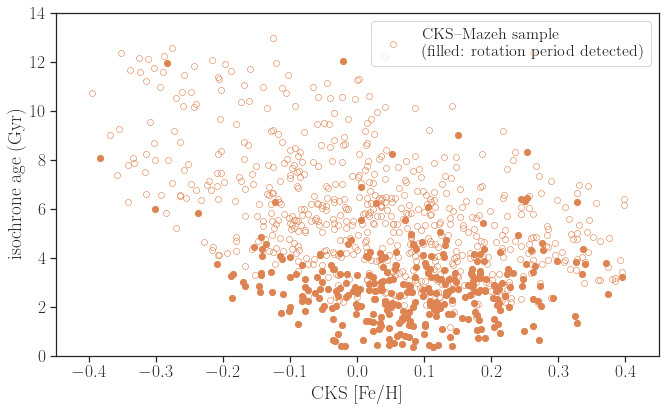

In [76]:
plt.figure(figsize=(12*0.9,7*0.9))
plt.xlabel("CKS [Fe/H]")
plt.ylabel("isochrone age (Gyr)")
plt.plot(dj.feh, dj.iso_age, 'o', mfc='none', mew=0.6, color='C1',
label='CKS--Mazeh sample\n(filled: rotation period detected)')
plt.plot(dj.feh[dj.acf], dj.iso_age[dj.acf], 'o', color='C1', alpha=1, label='')
plt.legend(loc='best', fontsize=16)
plt.xlim(-0.45, 0.45)
plt.ylim(0, 14)
plt.savefig("age_feh_%s.png"%djlabel, dpi=200, bbox_inches="tight")

In [82]:
rlabel = "variability amplitude $R_\mathrm{var}$ (ppm)"
protlabel = 'rotation period $P_\mathrm{rot}$ (days)'

In [78]:
mbin = np.array([0.75, 0.85, 0.95, 1.05, 1.15])
#mbin = np.arange(0.75, 1.15, 0.05)
#mbin = np.percentile(dj.iso_mass, [0, 15, 30, 45, 60, 75, 90])

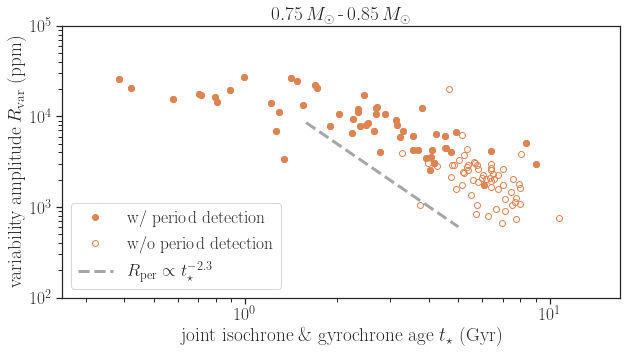

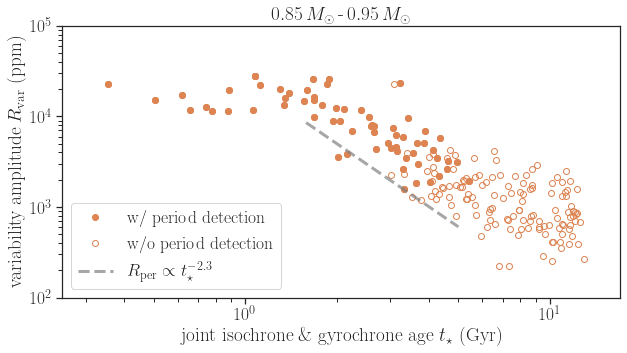

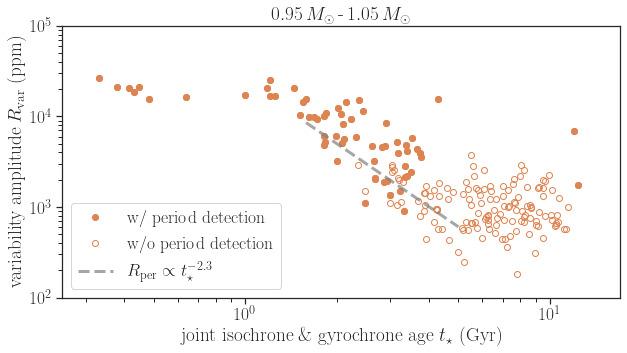

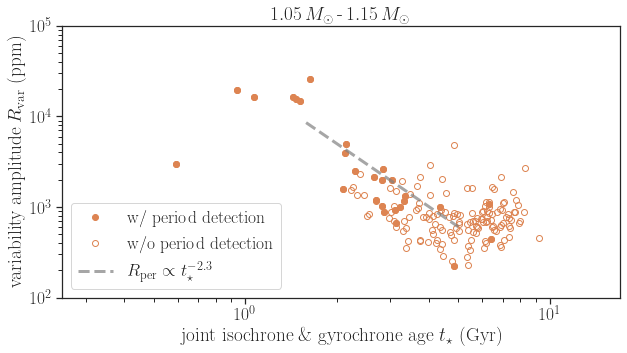

In [79]:
t0 = np.logspace(0.2, 0.7, 100)
for ml, mu in zip(mbin[:-1], mbin[1:]):
    idx = (ml < dj.iso_mass) & (dj.iso_mass < mu)
    plt.figure(figsize=(10,5))
    plt.title("$%.2f\,M_\odot\,$-$\,%.2f\,M_\odot$"%(ml, mu))
    plt.yscale("log")
    plt.xscale("log")
    plt.ylabel(rlabel)
    plt.xlabel("joint isochrone \& gyrochrone age $t_\star$ (Gyr)")
    plt.xlim(0.25, 17.)
    plt.ylim(1e2, 1e5)
    idxr = dj.acf & idx
    plt.plot(dj[idxr].iso_age, dj[idxr].Rvar, 'o', color='C1', label='w/ period detection')
    plt.plot(dj[idx].iso_age, dj[idx].Rvar, 'o', mfc='none', color='C1',  mew=1., 
             label='w/o period detection')
    plt.plot(t0, 5e3*(t0/2)**(-2.3), color='gray', ls='dashed', lw=3, alpha=0.7,
            label='$R_\mathrm{per} \propto t_\star^{-2.3}$')
    plt.legend(loc='lower left')
    plt.savefig(figdir+"rvar_age_m%.2f-%.2f.png"%(ml, mu), dpi=200, bbox_inches='tight')

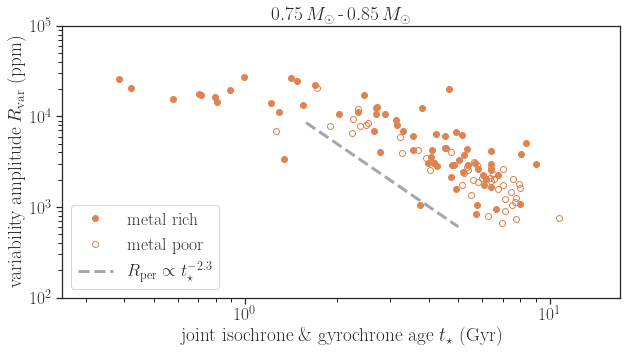

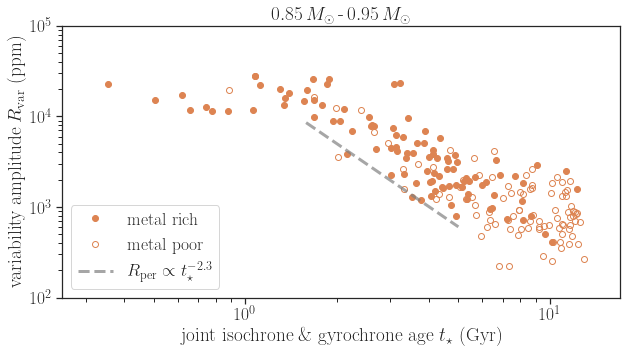

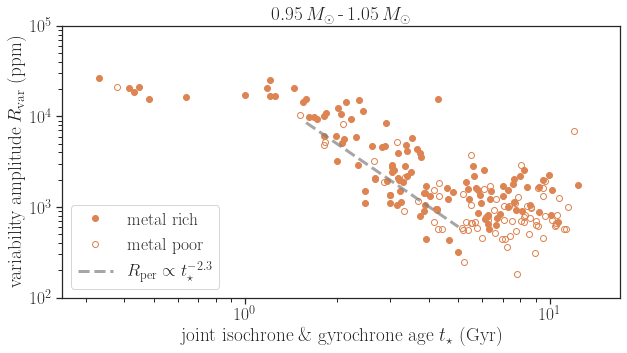

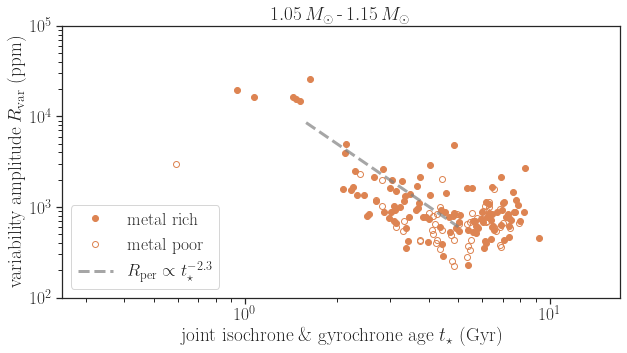

In [95]:
t0 = np.logspace(0.2, 0.7, 100)
for ml, mu in zip(mbin[:-1], mbin[1:]):
    idx = (ml < dj.iso_mass) & (dj.iso_mass < mu)
    plt.figure(figsize=(10,5))
    plt.title("$%.2f\,M_\odot\,$-$\,%.2f\,M_\odot$"%(ml, mu))
    plt.yscale("log")
    plt.xscale("log")
    plt.ylabel(rlabel)
    plt.xlabel("joint isochrone \& gyrochrone age $t_\star$ (Gyr)")
    plt.xlim(0.25, 17.)
    plt.ylim(1e2, 1e5)
    idxfeh = dj.feh > 0
    plt.plot(dj[idx&idxfeh].iso_age, dj[idx&idxfeh].Rvar, 'o', color='C1', label='metal rich')
    plt.plot(dj[idx&(~idxfeh)].iso_age, dj[idx&(~idxfeh)].Rvar, 'o', mfc='none', color='C1',  mew=1., 
             label='metal poor')
    plt.plot(t0, 5e3*(t0/2)**(-2.3), color='gray', ls='dashed', lw=3, alpha=0.7,
            label='$R_\mathrm{per} \propto t_\star^{-2.3}$')
    plt.legend(loc='lower left')
    #plt.savefig(figdir+"rvar_age_m%.2f-%.2f.png"%(ml, mu), dpi=200, bbox_inches='tight')

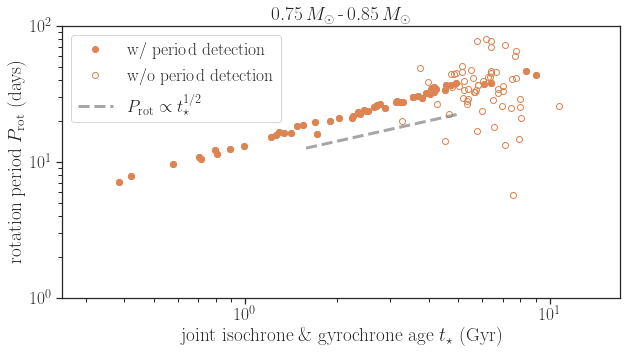

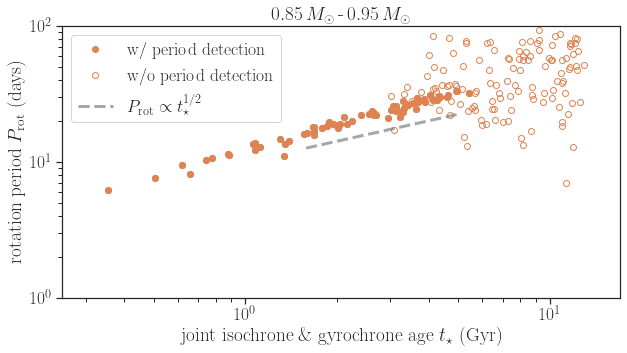

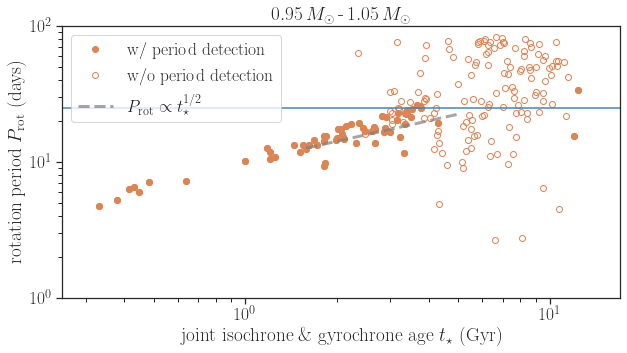

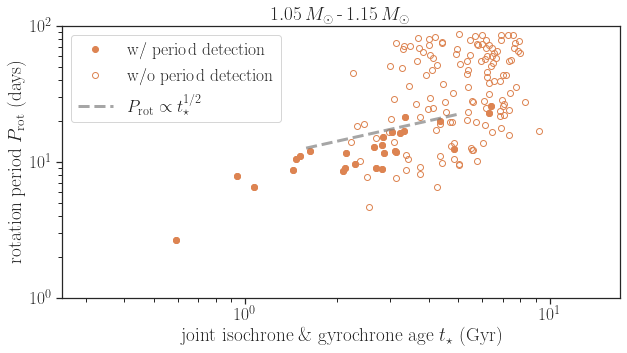

In [88]:
t0 = np.logspace(0.2, 0.7, 100)
for ml, mu in zip(mbin[:-1], mbin[1:]):
    idx = (ml < dj.iso_mass) & (dj.iso_mass < mu)
    plt.figure(figsize=(10,5))
    plt.title("$%.2f\,M_\odot\,$-$\,%.2f\,M_\odot$"%(ml, mu))
    plt.yscale("log")
    plt.xscale("log")
    plt.ylabel(protlabel)
    plt.xlabel("joint isochrone \& gyrochrone age $t_\star$ (Gyr)")
    plt.xlim(0.25, 17.)
    plt.ylim(1e0, 1e2)
    idxr = dj.acf & idx
    plt.plot(dj[idxr].iso_age, dj[idxr].Prot, 'o', color='C1', label='w/ period detection')
    plt.plot(dj[idx].iso_age, dj[idx].Prot, 'o', mfc='none', color='C1',  mew=1., 
             label='w/o period detection')
    plt.plot(t0, 10*t0**0.5, color='gray', ls='dashed', lw=3, alpha=0.7,
            label='$P_\mathrm{rot} \propto t_\star^{1/2}$')
    if ml==0.95:
        plt.axhline(y=25., color='steelblue')
    plt.legend(loc='best')
    #plt.savefig(figdir+"rvar_age_m%.2f-%.2f.png"%(ml, mu), dpi=200, bbox_inches='tight')

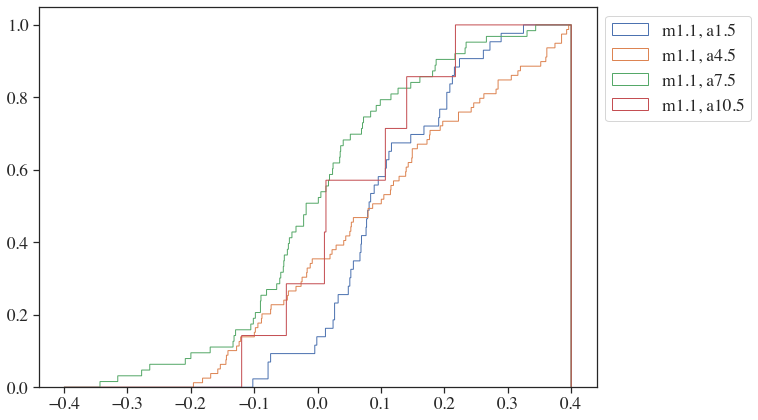

In [112]:
rc('text', usetex=True*0)
plt.figure(figsize=(10,7))
mbins = [0.7, 0.9, 1.1, 1.3]
abins = [0, 3, 6, 9, 12]
mbins = np.array([0.7, 0.8])+0.3
abins = [0, 3, 6, 9, 12]
fbins = np.linspace(-0.4, 0.4, 1000)
for ml, mu in zip(mbins[:-1], mbins[1:]):
    for al, au in zip(abins[:-1], abins[1:]):
        idx = (ml<dj.iso_mass) & (dj.iso_mass<mu) & (al<dj.iso_age) & (dj.iso_age<au)
        plt.hist(dj[idx].feh, density=True, bins=fbins, histtype='step', lw=1, 
                 cumulative=True, label='m%.1f, a%.1f'%(0.5*(ml+mu), 0.5*(al+au)))
plt.legend(loc='best', bbox_to_anchor=(1,1));

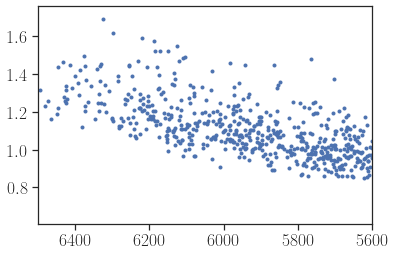

In [91]:
plt.xlim(6500, 5600)
plt.plot(d.teff, d.iso_mass, '.')

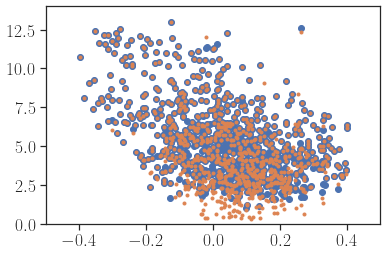

In [63]:
plt.xlim(-0.5, 0.5)
plt.ylim(0, 14)
plt.plot(d.feh, d.iso_age, 'o')
plt.plot(dj.feh, dj.iso_age, '.')

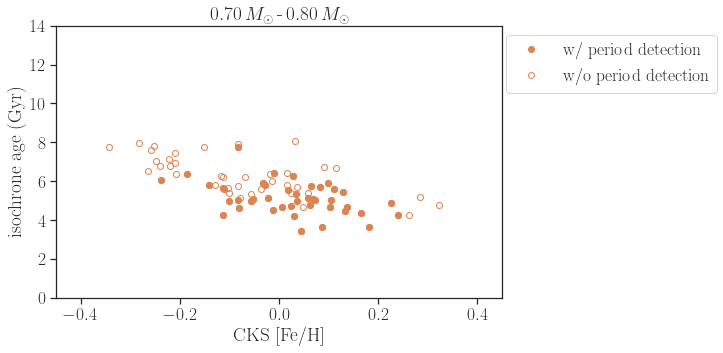

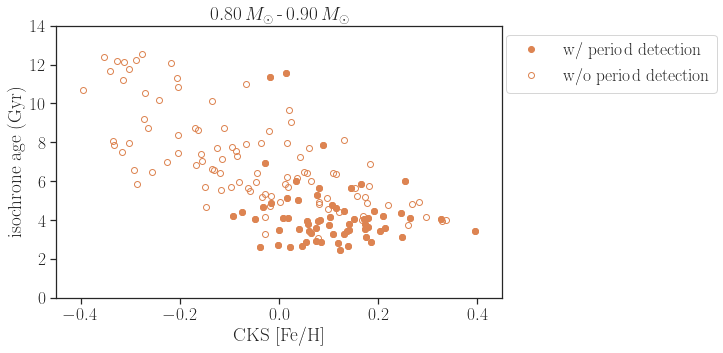

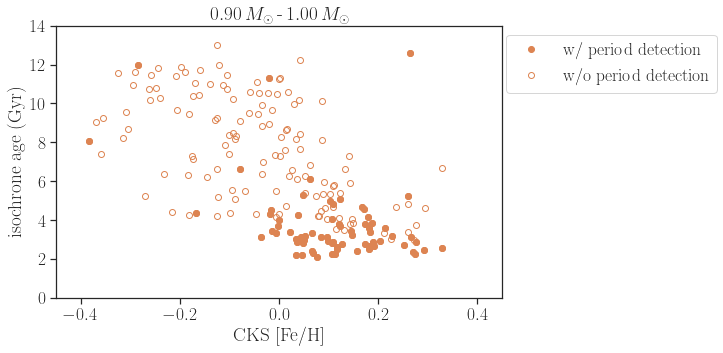

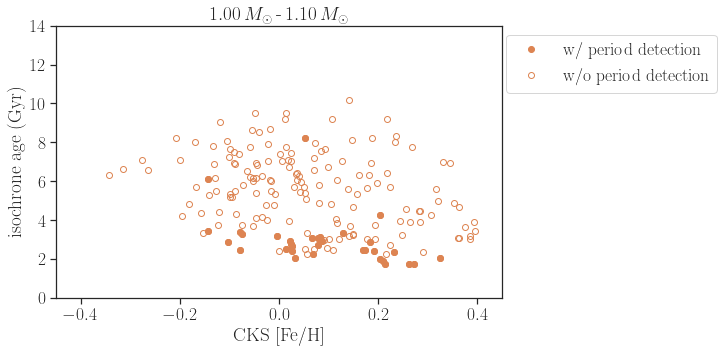

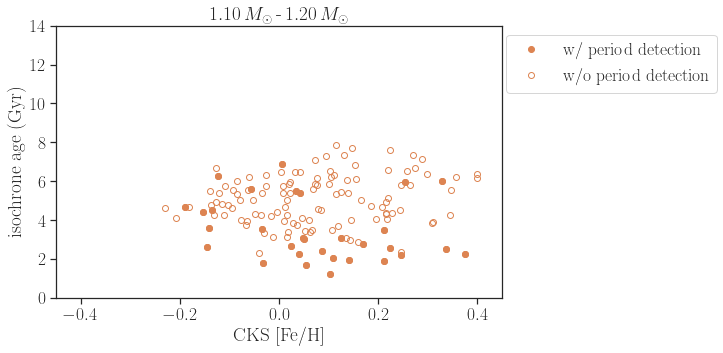

In [64]:
mbin = np.array([0.7, 0.8, 0.9, 1.0, 1.1, 1.2])
_d = d
for ml, mu in zip(mbin[:-1], mbin[1:]):
    idx = (ml < _d.iso_mass) & (_d.iso_mass < mu)
    plt.figure(figsize=(8,5))
    plt.title("$%.2f\,M_\odot\,$-$\,%.2f\,M_\odot$"%(ml, mu))
    plt.ylabel('isochrone age (Gyr)')
    plt.xlabel("CKS [Fe/H]")
    plt.xlim(-0.45, 0.45)
    plt.ylim(0, 14.)
    idxr = _d.acf & idx
    plt.plot(_d[idxr].feh, _d[idxr].iso_age, 'o', color='C1', label='w/ period detection')
    plt.plot(_d[idx].feh, _d[idx].iso_age, 'o', mfc='none', color='C1',  mew=1., 
             label='w/o period detection')
    plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))
    #plt.savefig(figdir+"rvar_age_m%.2f-%.2f.png"%(ml, mu), dpi=200, bbox_inches='tight')

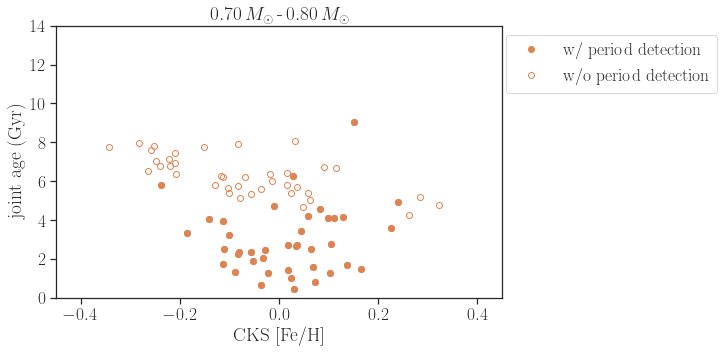

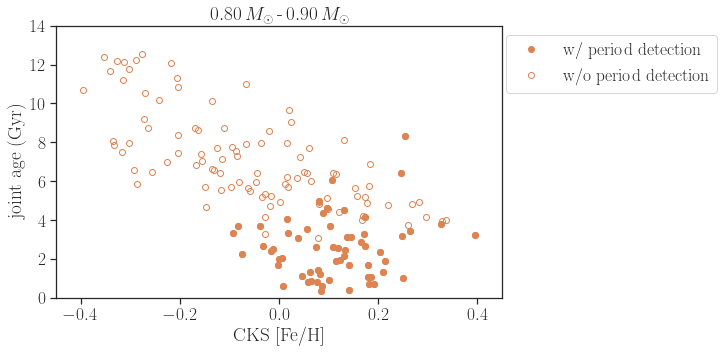

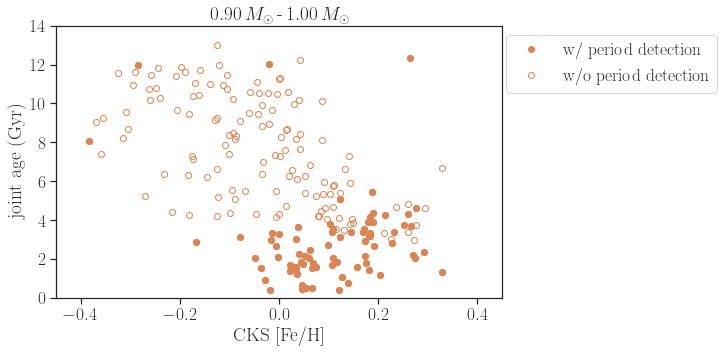

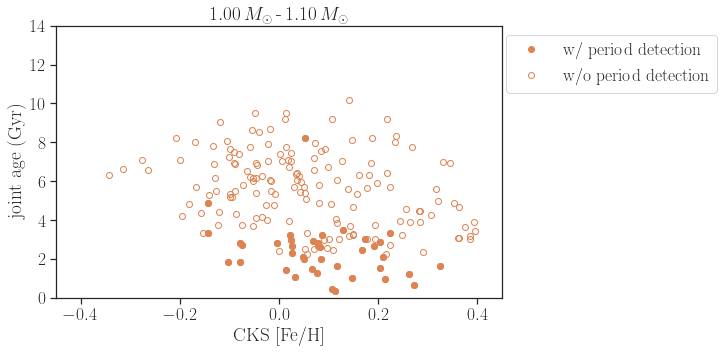

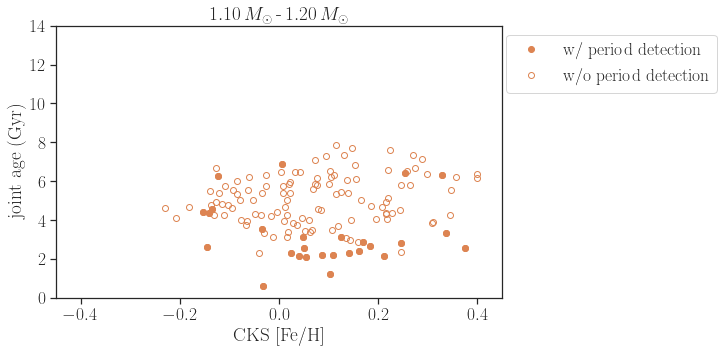

In [65]:
mbin = np.array([0.7, 0.8, 0.9, 1.0, 1.1, 1.2])
_d = dj
for ml, mu in zip(mbin[:-1], mbin[1:]):
    idx = (ml < _d.iso_mass) & (_d.iso_mass < mu)
    plt.figure(figsize=(8,5))
    plt.title("$%.2f\,M_\odot\,$-$\,%.2f\,M_\odot$"%(ml, mu))
    plt.ylabel('joint age (Gyr)')
    plt.xlabel("CKS [Fe/H]")
    plt.xlim(-0.45, 0.45)
    plt.ylim(0, 14.)
    idxr = _d.acf & idx
    plt.plot(_d[idxr].feh, _d[idxr].iso_age, 'o', color='C1', label='w/ period detection')
    plt.plot(_d[idx].feh, _d[idx].iso_age, 'o', mfc='none', color='C1',  mew=1., 
             label='w/o period detection')
    plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))
    #plt.savefig(figdir+"rvar_age_m%.2f-%.2f.png"%(ml, mu), dpi=200, bbox_inches='tight')